In [1]:
BASE_PATH = ".."
RAW_PATH = f"{BASE_PATH}/data/raw"
CLEAN_PATH = f"{BASE_PATH}/data/processed"

## EDA: Orders & Payments

In [2]:
import pandas as pd
import numpy as np

orders = pd.read_csv(f"{CLEAN_PATH}/orders_cleaned.csv")
payments = pd.read_csv(f"{CLEAN_PATH}/payments_cleaned.csv")

In [3]:
def restore_orders_dtypes(df):
    date_cols = [
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_customer_date",
        "order_estimated_delivery_date"
    ]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors="coerce")
    return df

orders = restore_orders_dtypes(orders)

In [25]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_delivered,delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True,2.0


In [26]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
is_delivered                               bool
delivery_days                           float64
dtype: object

In [38]:
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_days
count,99441,99281,96476,99441,96476.000000
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,12.094086
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-11 13:46:32,2016-09-30 00:00:00,0.000000
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,6.000000
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10.000000
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,15.000000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-10-17 13:22:46,2018-11-12 00:00:00,209.000000
std,NaN,NaN,NaN,NaN,9.551746


In [27]:
orders['order_status'].value_counts(normalize=True)

order_status
delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: proportion, dtype: float64

In [6]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

In [29]:
orders['delivery_days'] = (
    orders['order_delivered_customer_date'] -
    orders['order_purchase_timestamp']
).dt.days
(orders['delivery_days']<=0).sum()

np.int64(13)

In [30]:
orders[orders['delivery_days'] < 0][[
    'order_id',
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    'delivery_days',
    'order_status'
]]

,order_id,order_purchase_timestamp,order_delivered_customer_date,delivery_days,order_status


In [31]:
orders[orders['delivery_days'] == 0][[
    'order_id',
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    'order_status'
]]


,order_id,order_purchase_timestamp,order_delivered_customer_date,order_status
395,38c1e3d4ed6a13cd0cf612d4c09766e9,2018-02-02 15:26:38,2018-02-03 15:05:56,delivered
735,d3ca7b82c922817b06e5ca21165c5ea2,2017-11-16 13:54:08,2017-11-17 13:49:40,delivered
31522,1d893dd7ca5f77ebf5f59f0d2017eee0,2017-06-19 08:19:45,2017-06-19 21:07:52,delivered
37753,21a8ffca665bc7a1087d31751a7b7cbc,2017-05-31 12:00:35,2017-06-01 10:28:24,delivered
38792,f3c6775ba3d2d9fe2826f93b71f12008,2017-07-04 11:37:47,2017-07-05 08:09:26,delivered
41803,434cecee7d1a65fc65358a632b6f725f,2017-05-29 13:21:46,2017-05-30 08:06:56,delivered
48767,f349cdb62f69c3fae5c4d7d3f3a4a185,2018-06-28 14:34:48,2018-06-29 14:12:18,delivered
48878,d5fbeedc85190ba88580d6f82d1d5ed3,2017-05-15 11:50:53,2017-05-16 10:21:52,delivered
51067,e65f1eeee1f52024ad1dcd03447f7482,2018-05-18 15:03:19,2018-05-19 12:28:30,delivered
69291,79e324907160caea526fd8b94389dbbc,2018-06-18 12:59:42,2018-06-19 12:43:27,delivered


- 13 orders showed a delivery duration of zero days, indicating same-day delivery or timestamp granularity effects. These values were retained as valid observations.
- Zero delivery days occur when delivery happens within 24 hours of purchase due to day-level truncation. These represent same-day or next-day deliveries and were retained.

In [33]:
orders['delivery_days'].describe()

count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_days, dtype: float64

- While the median delivery time is 10 days, a small number of extreme outliers (up to 209 days) significantly increase the average delivery duration, indicating operational or fulfillment issues in rare cases.

In [34]:
orders[orders['delivery_days'] > 60]['order_status'].value_counts()

order_status
delivered    288
Name: count, dtype: int64

- 288 delivered orders experienced delivery times exceeding 60 days, indicating rare but severe fulfillment delays. Although low in volume, these extreme cases significantly skew average delivery metrics and likely impact customer satisfaction.

In [35]:
orders['delivery_days'].quantile([0.90, 0.95, 0.99])

0.90    23.0
0.95    29.0
0.99    46.0
Name: delivery_days, dtype: float64

- 90% of orders are delivered within 23 days, and 99% within 46 days. Extreme delays beyond this range are rare but significantly inflate the average delivery time.

In [36]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,is_zero_payment,zero_payment_flag
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,False,False
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,False,False
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,False,False
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,False,False
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,False,False


In [10]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
 5   is_zero_payment       103886 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 4.1+ MB


In [37]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [19]:
(payments['payment_value'] <= 0).sum()

np.int64(9)

In [20]:
payments[payments['payment_value'] <= 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,is_zero_payment
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0,True
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0,True
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0,True
51280,4637ca194b6387e2d538dc89b124b0ee,1,unknown,1,0.0,True
57411,00b1cb0320190ca0daa2c88b35206009,1,unknown,1,0.0,True
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0,True
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0,True
94427,c8c528189310eaa44a745b8d9d26908b,1,unknown,1,0.0,True
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0,True


In [21]:
payments.loc[
    payments['payment_value'] <= 0,
    'payment_type'
].value_counts()

payment_type
voucher    6
unknown    3
Name: count, dtype: int64

9 transactions had zero payment value, mostly vouchers. No negative payments were found

In [22]:
payments['zero_payment_flag'] = payments['payment_value'] == 0

- 9 transactions had zero payment value.
- 6 were voucher-based (expected behavior).
- 3 were marked as ‘unknown’ payment type, likely data recording issues.
- These rows were retained and flagged, as volume is negligible.

In [40]:
payments['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

<Axes: >

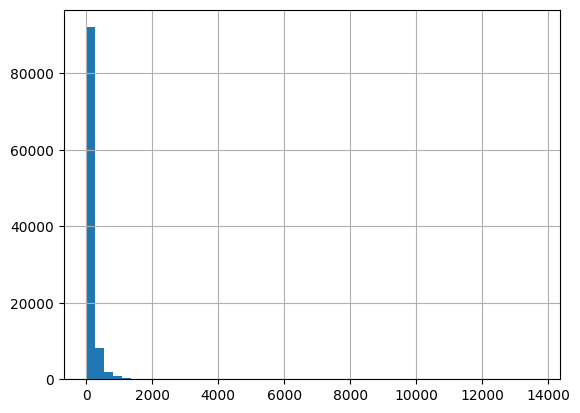

In [41]:
payments['payment_value'].hist(bins=50)

In [45]:
payments['payment_value'].median()

np.float64(100.0)

In [46]:
payments['payment_value'].mean()

np.float64(154.10038041699556)

- Payment values show a heavily right-skewed distribution, with most transactions concentrated at lower values and a small number of high-value outliers extending the tail. As a result, the median payment value better represents a typical transaction than the mean.

<Axes: >

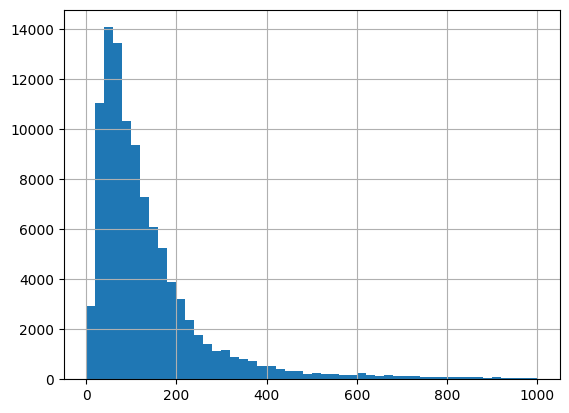

In [47]:
payments[payments['payment_value'] < 1000]['payment_value'].hist(bins=50)

### Payment Method Distribution

In [39]:
payments['payment_type'].value_counts(normalize=True)

payment_type
credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
unknown        0.000029
Name: proportion, dtype: float64

- Credit cards account for ~74% of all transactions, making them the dominant payment method by a wide margin.
- Boleto follows at ~19%, indicating a sizable segment preferring offline or delayed payment options.

In [32]:
payments.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)

payment_type
credit_card    163.319021
boleto         145.034435
debit_card     142.570170
voucher         65.703354
unknown          0.000000
Name: payment_value, dtype: float64

In [42]:
payments['payment_installments'].value_counts().sort_index()

payment_installments
0         2
1     52546
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: count, dtype: int64

<Axes: xlabel='payment_installments'>

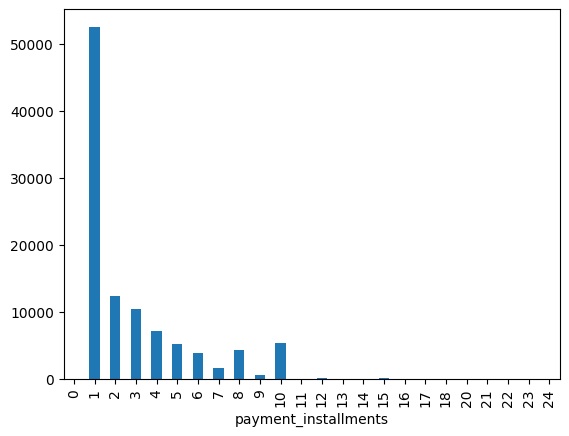

In [43]:
payments['payment_installments'].value_counts().sort_index().plot(kind='bar')

- Single-installment payments are the most common, with usage steadily declining as the number of installments increases. This suggests most customers prefer to pay in full, while installment usage is concentrated among a smaller subset of higher-value purchases.

In [44]:
payments.groupby('payment_installments')['payment_value'].mean()

payment_installments
0      94.315000
1     112.420229
2     127.228150
3     142.539317
4     163.976840
5     183.465222
6     209.849952
7     187.673672
8     307.737427
9     203.440870
10    415.085837
11    124.932174
12    321.678496
13    150.462500
14    167.962667
15    445.553108
16    292.694000
17    174.602500
18    486.483333
20    615.801765
21    243.700000
22    228.710000
23    236.480000
24    610.048889
Name: payment_value, dtype: float64

- Average payment value increases with the number of installments, indicating that installment-based payments are primarily used for higher-value purchases rather than as a default payment behavior.

In [48]:
orders.shape

(99441, 10)

In [49]:
payments.shape

(103886, 7)

In [50]:
orders_payments = orders.merge(
    payments,
    on="order_id",
    how="inner"
)

In [51]:
orders_payments.shape

(103886, 16)

In [52]:
orders_payments['order_id'].nunique()

99440

In [53]:
orders['order_id'].nunique()

99441

In [54]:
orders_payments.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
is_delivered                        0
delivery_days                    3132
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
is_zero_payment                     0
zero_payment_flag                   0
dtype: int64

- Null values observed in delivery-related timestamps correspond to orders that were not delivered. These nulls were present prior to merging and are expected.

In [55]:
orders_payments.groupby('payment_type')['payment_value'].mean()

payment_type
boleto         145.034435
credit_card    163.319021
debit_card     142.570170
unknown          0.000000
voucher         65.703354
Name: payment_value, dtype: float64

- Orders and payments were merged using an inner join on order_id. As payments are recorded at installment level, the merged dataset contains multiple rows per order, which was expected.

### Average Order Value by Payment Type

In [56]:
order_level = (
    orders_payments
    .groupby('order_id')
    .agg({
        'payment_value': 'sum',
        'payment_type': 'first'
    })
)

In [57]:
order_level.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)

payment_type
credit_card    166.633472
boleto         145.034435
debit_card     142.724158
voucher        131.279109
unknown          0.000000
Name: payment_value, dtype: float64

- After aggregating payments at the order level, credit card transactions show the highest average order value. This indicates that credit cards dominate not only in transaction volume but also in revenue contribution, making them the primary driver of overall sales value.

### Installments vs Total Order Value

In [58]:
order_level_installments = (
    orders_payments
    .groupby('order_id')
    .agg({
        'payment_value': 'sum',
        'payment_installments': 'max'
    })
)

In [59]:
order_level_installments.groupby('payment_installments')['payment_value'].mean()

payment_installments
0      94.315000
1     121.037471
2     129.124554
3     144.362109
4     165.060033
5     184.888619
6     211.594335
7     189.335475
8     309.774347
9     204.579534
10    418.747261
11    124.932174
12    323.051955
13    150.462500
14    176.310667
15    447.300405
16    292.694000
17    174.602500
18    490.187037
20    615.801765
21    243.700000
22    228.710000
23    236.480000
24    618.551667
Name: payment_value, dtype: float64

- Total order value increases with the number of payment installments, confirming that installment-based payments are primarily used for higher-value purchases rather than as a default payment behavior.

In [60]:
delivery_payment = (
    orders_payments
    .dropna(subset=['delivery_days'])
    .groupby('order_id')
    .agg({
        'delivery_days': 'first',
        'payment_value': 'sum',
        'payment_type': 'first'
    })
)

In [61]:
delivery_payment.groupby('payment_type')['delivery_days'].median()

payment_type
boleto         11.0
credit_card    10.0
debit_card      8.0
voucher        10.0
Name: delivery_days, dtype: float64

- Median delivery times are similar across payment methods, ranging from 8 to 11 days, suggesting that payment type does not significantly impact delivery duration.

In [62]:
delayed = delivery_payment[delivery_payment['delivery_days'] > 60]

In [63]:
delayed['payment_type'].value_counts(normalize=True)

payment_type
credit_card    0.750000
boleto         0.201389
voucher        0.038194
debit_card     0.010417
Name: proportion, dtype: float64

In [64]:
delayed['payment_value'].describe()

count     288.000000
mean      215.496667
std       264.652662
min        17.640000
25%        78.345000
50%       136.160000
75%       236.970000
max      2092.860000
Name: payment_value, dtype: float64

- Delayed deliveries (>60 days) are not disproportionately associated with any specific payment method, as their distribution closely mirrors overall payment usage. However, these delayed orders tend to have higher payment values compared to typical transactions, suggesting that higher-value purchases are more exposed to extreme fulfillment delays.

## EDA: Reveiws vs Delivery

In [5]:
reviews = pd.read_csv(f"{CLEAN_PATH}/reviews_cleaned.csv")

In [6]:
reviews["review_score"] = pd.to_numeric(
    reviews["review_score"], errors="coerce"
)
date_cols = [
    "review_creation_date",
    "review_answer_timestamp"
]

for col in date_cols:
    reviews[col] = pd.to_datetime(reviews[col], errors="coerce")

In [7]:
reviews.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [8]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       86893
review_comment_message     57769
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [9]:
orders[[
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]].dtypes

order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### Merginf Orders and Reveiws

In [10]:
order_reviews = orders.merge(
    reviews,
    on="order_id",
    how="inner"
)

In [11]:
order_reviews.shape

(98410, 15)

In [12]:
order_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_delivered,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51


In [13]:
order_reviews["delay_days"] = (
    order_reviews["order_delivered_customer_date"]
    - order_reviews["order_estimated_delivery_date"]
).dt.days

In [14]:
order_reviews["delay_days"].describe()

count    95607.000000
mean       -11.910802
std         10.109845
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delay_days, dtype: float64

In [15]:
order_reviews["delivery_status"] = "on_time"

order_reviews.loc[
    order_reviews["delay_days"] > 1,
    "delivery_status"
] = "late"

In [16]:
order_reviews["delivery_status"].value_counts(normalize=True)

delivery_status
on_time    0.943644
late       0.056356
Name: proportion, dtype: float64

In [17]:
pd.crosstab(
    order_reviews["delivery_status"],
    order_reviews["review_score"]
)

review_score,1,2,3,4,5
delivery_status,,,,,
late,3316,495,569,448,718
on_time,7966,2619,7528,18559,56192


In [18]:
pd.crosstab(
    order_reviews["delivery_status"],
    order_reviews["review_score"],
    normalize="index"
).round(3) * 100

review_score,1,2,3,4,5
delivery_status,,,,,
late,59.8,8.9,10.3,8.1,12.9
on_time,8.6,2.8,8.1,20.0,60.5


In [20]:
def review_bucket(score):
    if score <= 2:
        return "bad"
    elif score == 3:
        return "neutral"
    else:
        return "good"

order_reviews["review_category"] = order_reviews["review_score"].apply(review_bucket)


In [21]:
pd.crosstab(
    order_reviews["delivery_status"],
    order_reviews["review_category"],
    normalize="index"
).round(3) * 100

review_category,bad,good,neutral
delivery_status,,,
late,68.7,21.0,10.3
on_time,11.4,80.5,8.1


- Late deliveries are strongly associated with negative customer reviews, with ~68% of late orders receiving bad ratings, compared to ~80% good ratings for on-time or early deliveries.

- However, delivery performance is not the sole driver of customer satisfaction. A non-trivial portion of on-time deliveries still received poor reviews (~11%), while some late deliveries were rated positively (~21%), indicating that factors such as product quality, expectations, and customer experience also influence reviews.